## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Датасет содержит объявления о работе - настоящие и поддельные.
Задача состоит в том, чтобы определить тип объявления.

Установливаем библиотеку Pandas:

In [39]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [41]:
data = pd.read_csv('fake_job_postings.csv')
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Выводим первые 10 строк dataset-а:

In [42]:
data.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


Выводим последние 10 строк dataset-а:

In [43]:
data.tail(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",NaN,NaN,PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",NaN,NaN,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,NaN,0
17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,NaN,NaN,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,1,0,Contract,NaN,NaN,Utilities,NaN,0
17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


### О наборе данных:

[Real or Fake] : Fake Job Description Prediction
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [44]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'title'], end="\n\n")
print(data["title"][2], end="\n\n")
print(data["title"].dtype, end="\n\n")
print(type(data["title"]), end="\n\n")
print(type(data["title"][2]), end="\n\n")

(17880, 18)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

RangeIndex(start=0, stop=17880, step=1)

Commissioning Machinery Assistant (CMA)

Commissioning Machinery Assistant (CMA)

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [45]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
data.describe(include = ['object'])

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [47]:
data.describe(include = 'all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [48]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [49]:
data.corr()

C:\Users\Nick\AppData\Local\Temp\ipykernel_15384\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


Визуализируем данную матрицу корреляции:

In [50]:
import sys
! pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Nick\AppData\Local\Temp\ipykernel_15384\4293635737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<AxesSubplot: >

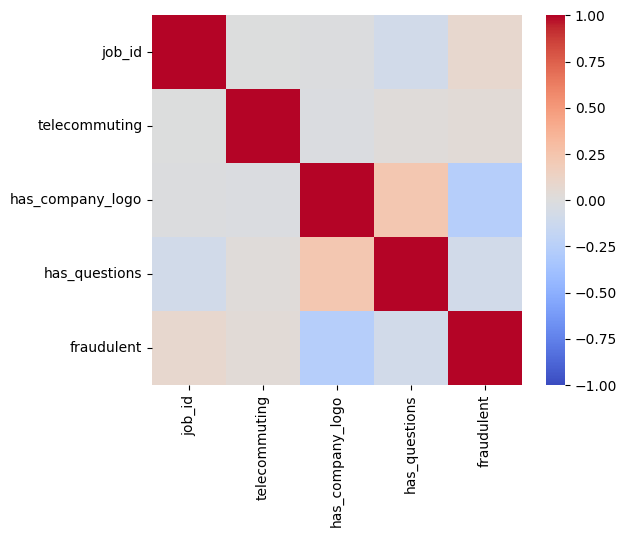

In [51]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Наблюдается слабая корреляция признаков.

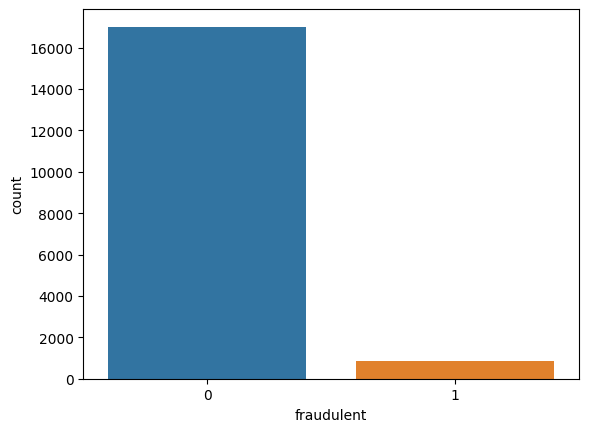

In [52]:
data['fraudulent'].value_counts() / data['fraudulent'].value_counts().sum()*100
sns.countplot(x='fraudulent', data=data)
pass

Значительная неравномерность распределения классов

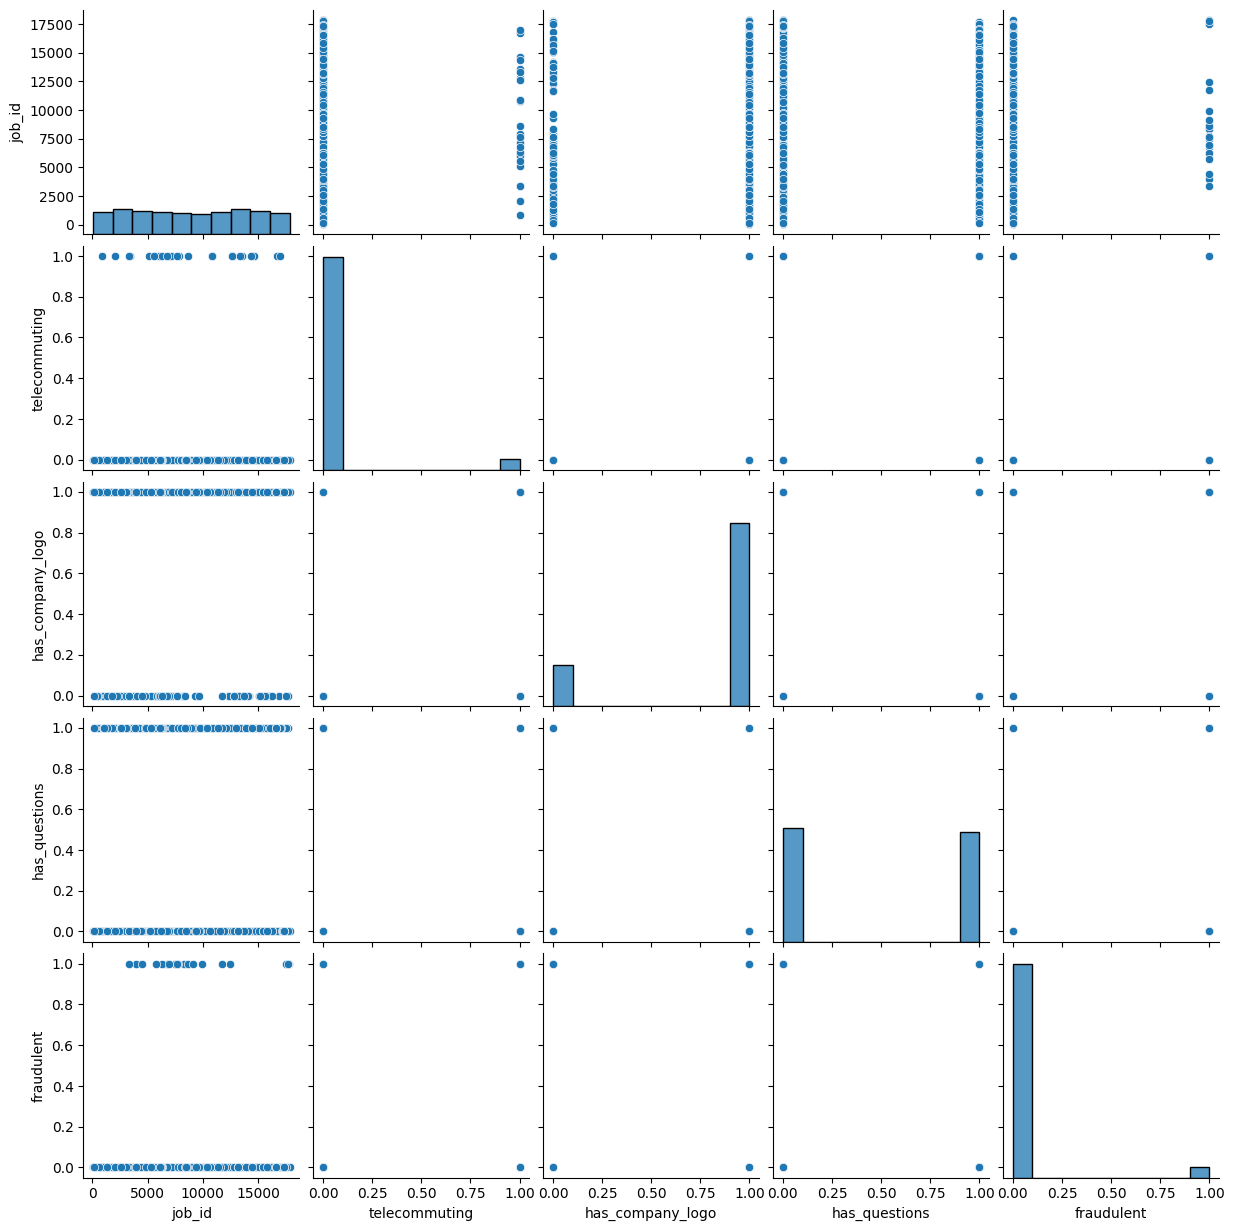

In [53]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind="hist")
pass

Выведем уникальные значения для некоторых нечисловых признаков:

In [54]:
data['location'].unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [55]:
data['department'].unique()

array(['Marketing', 'Success', nan, ..., 'Admin - Clerical',
       'Administrative Dept', 'Hospitality'], dtype=object)

## Готовим данные

Для предсказания оригинальности вакансии будем использовать все признаки, кроме: job_id, location, department, salary_range, description, title, company_profile, benefits, requirements.

In [56]:
data=data.drop(['job_id','location','department','salary_range','description','title','company_profile','benefits','requirements'],axis=1)

Рассортируем категориальные и численные признаки:

In [57]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['employment_type', 'required_experience', 'required_education', 'industry', 'function']
['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


Выведем все уникальные значения для каждого категориального признака:

In [58]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

employment_type: ['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']
required_experience: ['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']
required_education: [nan "Bachelor's Degree" "Master's Degree" 'High School or equivalent'
 'Unspecified' 'Some College Coursework Completed' 'Vocational'
 'Certification' 'Associate Degree' 'Professional' 'Doctorate'
 'Some High School Coursework' 'Vocational - Degree'
 'Vocational - HS Diploma']
industry: [nan 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services'
 'Management Consulting' 'Events Services' 'Internet'
 'Facilities Services' 'Consumer Electronics' 'Telecommunications'
 'Consumer Services' 'Construction' 'Oil & Energy' 'Education Management'
 'Building Materials' 'Banking' 'Food & Beverages' 'Food Production'
 'Health, Wellness and Fitness' 'Insurance' 'E-Learning' 'Cosmetics'


In [59]:
data.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Заполним пропущенные значения модой

In [60]:
columns_list=list(data.columns)

for i in columns_list:
    if data[i].dtype=='object':
        data[i]=data[i].replace(np.nan,data[i].mode()[0],regex=True)

data.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [61]:
! pip install scikit-learn scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Присваивание меток объектам типа 'object'
for i in columns_list:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])
        
x=data.drop(['fraudulent'],axis=1)
y=data['fraudulent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [130]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")
    
rus = RandomOverSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")

n_neighbors: 1
train error:  0.14446002805049088
test error:  0.15715883668903805
--------------
n_neighbors: 2
train error:  0.19915848527349228
test error:  0.09703579418344518
--------------
n_neighbors: 5
train error:  0.22230014025245443
test error:  0.18484340044742728
--------------
n_neighbors: 10
train error:  0.25666199158485276
test error:  0.1977069351230425
--------------
n_neighbors: 15
train error:  0.27489481065918653
test error:  0.24272930648769575
--------------
n_neighbors: 20
train error:  0.2903225806451613
test error:  0.21364653243847875
--------------
n_neighbors: 1
train error:  0.14446002805049088
test error:  0.15715883668903805
--------------
n_neighbors: 2
train error:  0.19915848527349228
test error:  0.09703579418344518
--------------
n_neighbors: 5
train error:  0.22230014025245443
test error:  0.18484340044742728
--------------
n_neighbors: 10
train error:  0.25666199158485276
test error:  0.1977069351230425
--------------
n_neighbors: 15
train error: 

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [132]:
y_test_predict = knn.predict(x_test)
y_train_predict = knn.predict(x_train)
err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [133]:
print(err_train)
print(err_test)

0.25666199158485276
0.1977069351230425


In [134]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[625  88]
 [278 435]]

[[2776  647]
 [  60   93]]



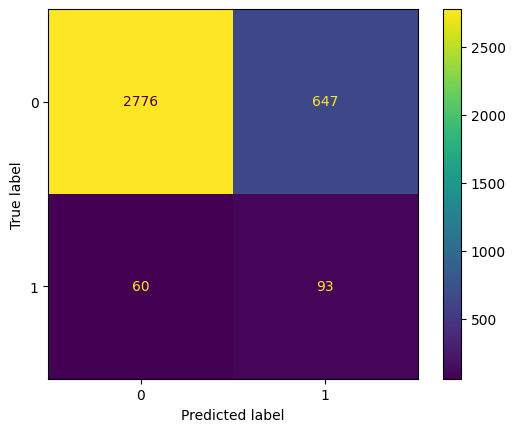

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [68]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=2:

In [137]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print(err_train)
print(err_test)

0.19915848527349228
0.09703579418344518


## Другие алгоритмы обучения:

### SVC:

In [138]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.10308555399719495
0.1761744966442953


### Random Forest:

In [139]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.07082748948106592
0.16666666666666666


### Extremely Randomized Trees:

In [140]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(x_train, y_train)

err_train = np.mean(y_train != ert.predict(x_train))
err_test  = np.mean(y_test  != ert.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.07082748948106592
0.171420581655481


### AdaBoost:

In [141]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(x_train, y_train)

err_train = np.mean(y_train != ada.predict(x_train))
err_test = np.mean(y_test != ada.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.17461430575035064
0.22930648769574943


### GBT:

In [142]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(x_train, y_train)

err_train = np.mean(y_train != gbt.predict(x_train))
err_test = np.mean(y_test != gbt.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.07503506311360449
0.1708612975391499


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.024. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.


## Домашнее задание 5

In [105]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 225.4/225.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
from sklearn.neural_network import MLPClassifier

In [144]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'sgd',
                          activation = 'logistic',
                          random_state = 78,
                          max_iter=1000)

In [145]:
%%time
mlp_model.fit(x_train, y_train)

CPU times: total: 12.5 s
Wall time: 12.4 s


MLPClassifier(activation='logistic', max_iter=1000, random_state=78,
              solver='sgd')

In [146]:
mlp_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)


In [148]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.2503506311360449 0.2815995525727069


In [149]:
from sklearn.metrics import accuracy_score

### Нейронная сеть с одним скрытым слоем на 100 элементов, подбор параметра alpha

In [150]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

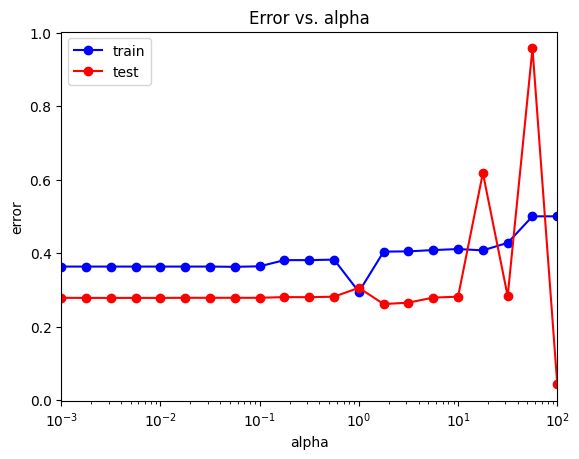

In [151]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

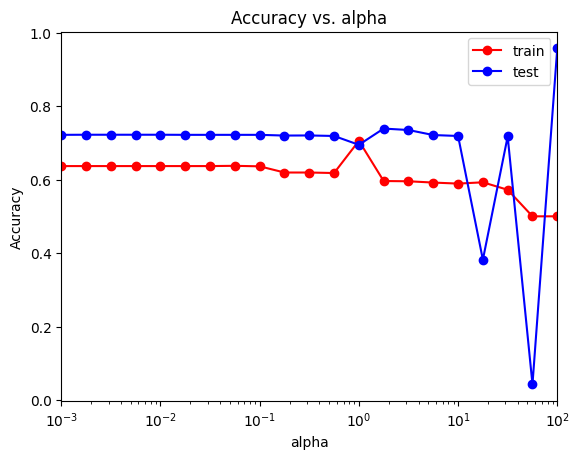

In [152]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [153]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.29453015427769985 0.04278523489932886


In [154]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[100.]


In [155]:
mlp_model = MLPClassifier(alpha = alpha_opt.min(), hidden_layer_sizes = (100,),
                          solver = 'sgd', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.5
0.04278523489932886


*Выводы:* Наилучший результат достигается при alpha = 3.16227766. Ошибка на тестовых данных равна ~0.23-0.24, ошибка на тренировочных данных - ~0.23. При меньшем alpha наблюдается понижение ошибки на тренировочных данных и повышение на тестовых, что свидетельствует о переобучении.

In [156]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[3423  153]
 [   0    0]]


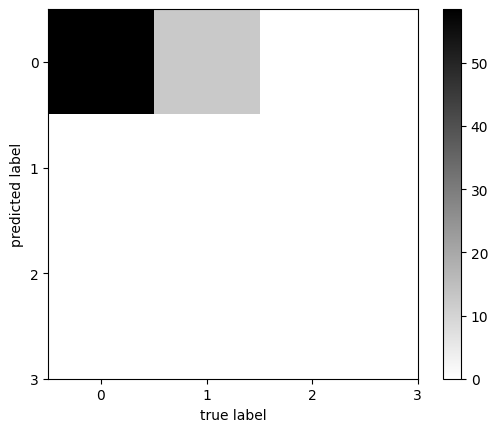

In [157]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [158]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [159]:
# plot_confusion_matrix(mlp_model, x_test, y_test) 

In [160]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3423
           1       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Нейронная сеть с двумя скрытыми слоями на 50 элементов каждый

In [164]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, 50), 
                          solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.4165497896213184
0.2625838926174497


*Выводы:* наблюдается маленькая ошибка (\~0.04) на тренировочных данных и большая ошибка на тестовых данных (\~0.3), что свидетельствует о переобучении. Попробуем подобрать меньшее количество нейронов на каждом слое:

In [165]:
i_ans = -1
j_ans = -1
y_train_ans = 100500
y_test_ans = 100500

for i in [5, 10, 15, 20, 25]:
    for j in [5, 10, 15, 20, 25]:
        mlp_model = MLPClassifier(hidden_layer_sizes = (i, j), 
                                  solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)

        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        print(i, j, ':')
        print(np.mean(y_train != y_train_pred))
        print(np.mean(y_test != y_test_pred))
        if np.mean(y_test != y_test_pred) < y_test_ans:
            i_ans       = i
            j_ans       = j
            y_train_ans = np.mean(y_train != y_train_pred)
            y_test_ans  = np.mean(y_test != y_test_pred)
        print('------')
print("best:", i_ans, j_ans, y_train_ans, y_test_ans)

5 5 :
0.5
0.9572147651006712
------
5 10 :
0.5
0.9572147651006712
------
5 15 :
0.4908835904628331
0.053691275167785234
------
5 20 :
0.5
0.04278523489932886
------
5 25 :
0.5
0.04278523489932886
------
10 5 :
0.49719495091164095
0.051733780760626395
------
10 10 :
0.5063113604488079
0.16275167785234898
------
10 15 :
0.42496493688639553
0.6733780760626398
------
10 20 :
0.49228611500701264
0.10626398210290827
------
10 25 :
0.5462833099579243
0.33808724832214765
------
15 5 :
0.5
0.9572147651006712
------
15 10 :
0.46143057503506313
0.8031319910514542
------
15 15 :
0.4438990182328191
0.4272930648769575
------
15 20 :
0.4796633941093969
0.4899328859060403
------
15 25 :
0.42917251051893407
0.31291946308724833
------
20 5 :
0.5
0.04278523489932886
------
20 10 :
0.5084151472650772
0.9398769574944071
------
20 15 :
0.5
0.9572147651006712
------
20 20 :
0.4270687237026648
0.2505592841163311
------
20 25 :
0.3225806451612903
0.3540268456375839
------
25 5 :
0.44530154277699857
0.112695749

Наилучшие результаты на двухслойной нейронной сети по ошибке на тестовой выборке получились при двух слоях на 10 нейронов каждый. Ошибка на тренировочной выборке ~= 0.21, на тестовой выборке ~0.24. Попробуем для такой нейронной сети подобрать оптимальное значение alpha.

In [166]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10, 10), 
                              solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

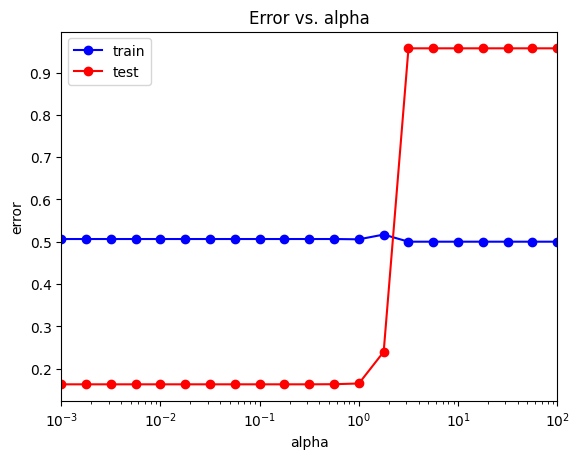

In [167]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

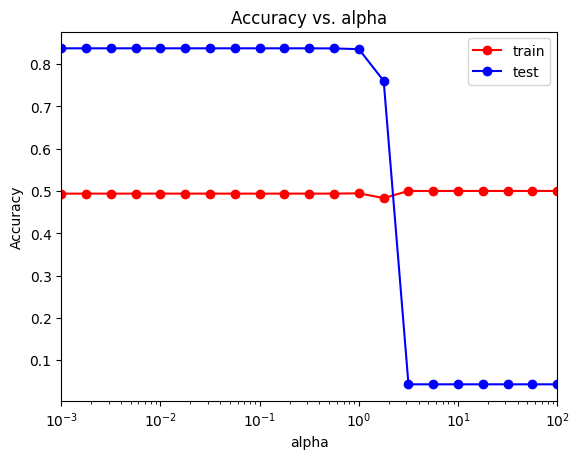

In [168]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [169]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.5 0.16275167785234898


В самом лучшем случае ошибка на тестовой выборке не снижается ниже 0.24, а значение accuracy не поднимается выше 0.79.

### Нейронная сеть с одним скрытым слоем, подбор числа нейронов и оптимального alpha

In [171]:
num_elems_arr = [x for x in range(10, 101, 10)]
alpha_arr = np.logspace(-3, 2, 11)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, num_elems in enumerate(num_elems_arr):
    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (num_elems,), 
                              solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)
        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        train_err[index] = np.append(train_err[index], np.mean(y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(y_test != y_test_pred))
        train_acc[index] = np.append(train_acc[index], accuracy_score(y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(y_test, y_test_pred))
    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])
    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err
    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.wa

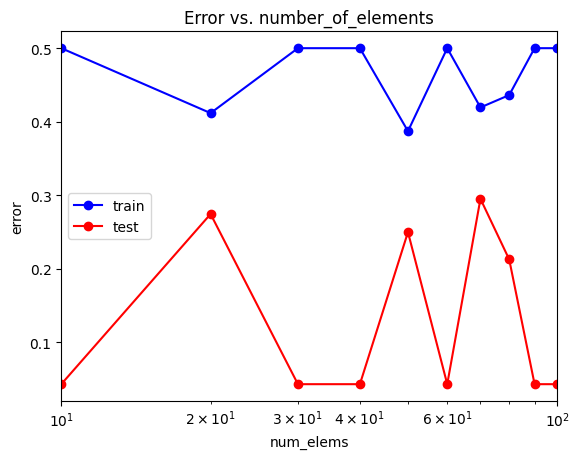

In [172]:
plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Error vs. number_of_elements')
plt.xlabel('num_elems')
plt.ylabel('error')
plt.legend()

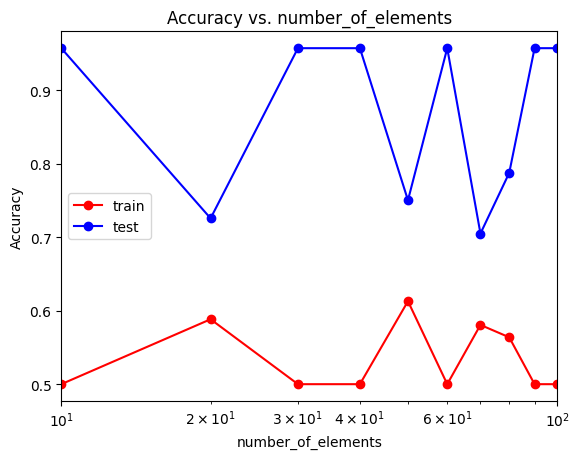

In [173]:
plt.semilogx(num_elems_arr, min_train_accuracy, 'r-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_accuracy, 'b-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Accuracy vs. number_of_elements')
plt.xlabel('number_of_elements')
plt.ylabel('Accuracy')
plt.legend()

In [174]:
print(min_test_errors[5])
print(alpha_opts[5])

0.04278523489932886
[100.]


Выводы: наименьшая ошибка, равная ~0.2313 наблюдается при количестве нейронов, равным 60.

## **Заключение**

Можно сделать следующие выводы
* Был проведён ряд запусков нейронной сети с различным количеством нейронов и подбором параметра alpha;
* Наилучшие результаты были получены при использовании нейронной сети с одним скрытым слоем с 60 нейронами при параметре alpha = 3.16227766. Ошибка на тестовой выборке составила 23.1%;
* При использовании 2 слоёв нейронной сети самый лучший результат получился при использовании слоёв по 10 нейронов каждый. Ошибка на тестовой выборке составила 24.8%;
* При использовании алгоритма KNN в наилучшем случае удалось добиться ошибки в 26.6% на тестовой выборке. Таким образом, нейронная сеть дала результат лучше на 3.5%. 

Запустим ряд других классификаторов.

## Gradient boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(50,501,50)]

for i in est_vals:
    boost = GradientBoostingClassifier(n_estimators = i)
    boost.fit(x_train, y_train)

    y_test_predict = boost.predict(x_test)
    err_train = np.mean(y_train != boost.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  50
err_train: 0.15568022440392706
err_test: 0.21085011185682326
---------
n_estimators =  100
err_train: 0.13394109396914447
err_test: 0.1929530201342282
---------
n_estimators =  150
err_train: 0.12061711079943899
err_test: 0.18400447427293065
---------
n_estimators =  200
err_train: 0.1093969144460028
err_test: 0.18260626398210292
---------
n_estimators =  250
err_train: 0.1002805049088359
err_test: 0.17589485458612975
---------
n_estimators =  300
err_train: 0.09747545582047686
err_test: 0.1756152125279642
---------
n_estimators =  350
err_train: 0.09747545582047686
err_test: 0.1767337807606264
---------
n_estimators =  400
err_train: 0.09326788218793829
err_test: 0.17253914988814317
---------
n_estimators =  450
err_train: 0.09046283309957924
err_test: 0.17421700223713646
---------
n_estimators =  500
err_train: 0.08695652173913043
err_test: 0.17309843400447428
---------
best: 0.09326788218793829 0.17253914988814317


Text(0, 0.5, 'error')

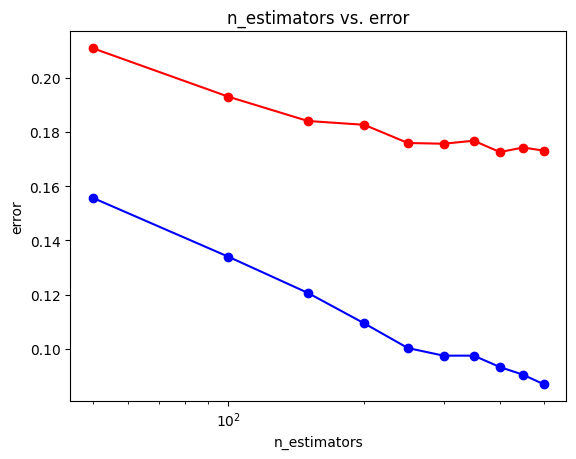

In [176]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [177]:
boost = GradientBoostingClassifier(n_estimators = 450)
boost.fit(x_train, y_train)

y_test_predict = boost.predict(x_test)
err_train = np.mean(y_train != boost.predict(x_train))
err_test = np.mean(y_test != y_test_predict)
print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[2823   24]
 [ 600  129]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3423
           1       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самый лучший результат для метода Gradient Boost по ошибке на тесте достигает 21.2%.

## Random forest classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(25,201,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)

    y_test_predict = rfc.predict(x_test)
    err_train = np.mean(y_train != rfc.predict(x_train))
    err_test  = np.mean(y_test  != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  25
err_train: 0.0729312762973352
err_test: 0.1767337807606264
---------
n_estimators =  50
err_train: 0.07082748948106592
err_test: 0.16722595078299776
---------
n_estimators =  75
err_train: 0.07082748948106592
err_test: 0.17058165548098433
---------
n_estimators =  100
err_train: 0.07082748948106592
err_test: 0.16750559284116331
---------
n_estimators =  125
err_train: 0.07082748948106592
err_test: 0.17197986577181207
---------
n_estimators =  150
err_train: 0.07082748948106592
err_test: 0.16750559284116331
---------
n_estimators =  175
err_train: 0.07082748948106592
err_test: 0.16890380313199105
---------
n_estimators =  200
err_train: 0.07082748948106592
err_test: 0.16554809843400448
---------
best: 0.07082748948106592 0.16554809843400448


Text(0, 0.5, 'error')

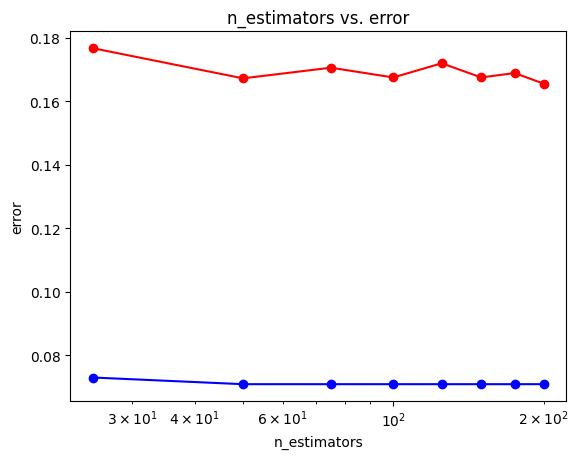

In [179]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [180]:
rfc = RandomForestClassifier(n_estimators=175)
rfc.fit(x_train, y_train)

y_test_predict = rfc.predict(x_test)
err_train = np.mean(y_train != rfc.predict(x_train))
err_test  = np.mean(y_test  != y_test_predict)

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[2850   21]
 [ 573  132]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3423
           1       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самый лучший результат для Random forest classifier - 18.3% ошибки на тестовой выборке.

## Decision Tree Classifier

In [181]:
from sklearn.tree import DecisionTreeClassifier


err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


max_depths = [x for x in range(2, 16, 2)]

for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)

    y_test_predict = dtc.predict(x_test)
    err_train = np.mean(y_train != dtc.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("max_depth = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

max_depth =  2
err_train: 0.23281907433380084
err_test: 0.311241610738255
---------
max_depth =  4
err_train: 0.18863955119214587
err_test: 0.20553691275167785
---------
max_depth =  6
err_train: 0.1514726507713885
err_test: 0.2203579418344519
---------
max_depth =  8
err_train: 0.12482468443197756
err_test: 0.2332214765100671
---------
max_depth =  10
err_train: 0.10168302945301542
err_test: 0.22483221476510068
---------
max_depth =  12
err_train: 0.09046283309957924
err_test: 0.20441834451901567
---------
max_depth =  14
err_train: 0.07994389901823282
err_test: 0.20385906040268456
---------
best: 0.07994389901823282 0.20385906040268456


Text(0, 0.5, 'error')

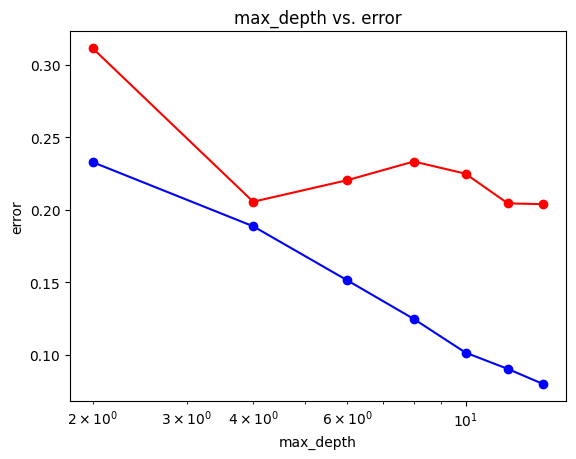

In [182]:
plt.semilogx(max_depths, train_errors, 'b-o', label = 'train')
plt.semilogx(max_depths, test_errors, 'r-o', label = 'test')
plt.title('max_depth vs. error')
plt.xlabel('max_depth')
plt.ylabel('error')

In [183]:
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[2719  704]
 [  25  128]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      3423
           1       0.15      0.84      0.26       153

    accuracy                           0.80      3576
   macro avg       0.57      0.82      0.57      3576
weighted avg       0.96      0.80      0.86      3576



Лучший результат для данного метода - 24.1% на тестовой выборке.

# Логистическая регрессия

In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(x_train, y_train)

y_test_predict = clf.predict(x_test)
y_train_predict = clf.predict(x_train)

err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_predict))

err_train=0.24544179523141654
err_test=0.22175615212527963

[[2682   52]
 [ 741  101]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      3423
           1       0.12      0.66      0.20       153

    accuracy                           0.78      3576
   macro avg       0.55      0.72      0.54      3576
weighted avg       0.94      0.78      0.84      3576



## Общие выводы

* Самый лучший результат показал метод Random forest classifier с ошибкой в 18.3%.
* Самый худший результат показал метод KNN с ошибкой на тестовой выборке в 26.6%.
* Decision Tree Classifier показал результат в 24.1% ошибки на тестовой выборке, Gradient Boosting - 21.2%
* Методы oversampling и undersampling не подходят для борьбы с несбалансированностью классов в данном случае.